<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In [ ]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
#import json

In [ ]:
pd.set_option('display.max_rows', None)

# No need

## Prepare dataset

## merge files (json to dict)

In [ ]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_21_30.json', 'r') as f:
    file3 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_31_44.json', 'r') as f:
    file4 = json.load(f)

In [ ]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

data = concat_json_files([file1, file2, file3, file4])

## 確認合併成功
len(data['topic'])

293840

## dict to pd.dataframe

In [ ]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


In [ ]:
# check duplicate
df[df.topic.duplicated()==True].shape

df = df.drop_duplicates(subset=['topic'], keep="first")

print(df.shape)
df.head()

(292648, 2)


,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...
3,https://www.econjobrumors.com/topic/just-found...,[Why? Why would you ever study such a thing?]
4,https://www.econjobrumors.com/topic/karen-and-...,"[What happens next?, Mutant babies., Zhang pos..."


## Prepare y and X

In [ ]:
asia_target = ['asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']
china_target = ['china', 'chinese']

In [ ]:
both_target = asia_target + china_target
print(both_target)

['asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese']


In [ ]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in china_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in china_target):
        return "china"
    else:
        return "other"
 
# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china


In [ ]:
df.groupby('Target').size()

Target
asia       2508
both        282
china      5177
other    284681
dtype: int64

## Prepare df.y

## china vs other random

In [ ]:
df[df['Target'] == 'china'].shape

(5177, 3)

### 1:1 = china : other

In [ ]:
df_co = pd.concat([df[df['Target'] == 'china'], 
          df[df['Target'] == 'other'].sample(n = df[df['Target'] == 'china'].shape[0], random_state=1941)])
print(df_co.shape)
df_co.head(3)

(10354, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china


In [ ]:
df_co['y'] = df_co['Target'].apply(lambda x: 1 if x == 'china' else 0)
df_co.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china,1


### 1:2 = china : other

In [ ]:
df_co2 = pd.concat([df[df['Target'] == 'china'], 
          df[df['Target'] == 'other'].sample(n = df[df['Target'] == 'china'].shape[0]*2, random_state=1942)
          ])
print(df_co2.shape)
df_co2.head(3)

(15531, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china


In [ ]:
df_co2['y'] = df_co2['Target'].apply(lambda x: 1 if x == 'china' else 0)
df_co2.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china,1


## asia (asia+china+both) vs random

In [ ]:
df[df['Target'] != 'other'].shape

(7967, 3)

### 1:1 = asia : other

In [ ]:
df_ao = pd.concat([df[df['Target'] != 'other'], 
          df[df['Target'] == 'other'].sample(n = df[df['Target'] != 'other'].shape[0], random_state=2006)
          ])

print(df_ao.shape)
df_ao.head(3)

(15934, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [ ]:
df_ao['y'] = df_ao['Target'].apply(lambda x: 1 if x == 'asia' else 0)
df_ao.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,0
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,0


### 1:2 = asia : other

In [ ]:
df_ao2 = pd.concat([df[df['Target'] != 'other'], 
          df[df['Target'] == 'other'].sample(n = df[df['Target'] != 'other'].shape[0]*2, random_state=1967)
          ])
print(df_ao2.shape)
df_ao2.head(3)

(23901, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [ ]:
df_ao2['y'] = df_ao2['Target'].apply(lambda x: 1 if x == 'asia' else 0)
df_ao2.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,0
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,0


## Prepare X (Preprocessing, Stemming/Lemmatization)

In [ ]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens & remove the only character 
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens if len(token) > 1]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if len(token) > 1]

  return tokens

In [ ]:
## check library # for what?
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Tokenization *4dataset *2token 

## _co

In [ ]:
## the input type
df_co['stemmed_tokenized'] = df_co['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_co.shape)
df_co['lemmatized_tokenized'] = df_co['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_co.shape)

(10354, 5)
(10354, 6)


In [ ]:
print( df_co[df_co['lemmatized_tokenized'].str.len() == 0].shape)
print( df_co[df_co['stemmed_tokenized'].str.len() == 0].shape)

(264, 6)
(264, 6)


In [ ]:
# delete blank space
df_co = df_co[df_co['lemmatized_tokenized'].str.len() != 0]
print(df_co.shape)
df_co[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(10090, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"
69,1,"[olymp, olymp, news, whether, would, war, russ...","[olympics, olympics, news, whether, would, war..."


In [ ]:
df_co[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_tokens_a.pkl")

## _co2

In [ ]:
## the input type
df_co2['stemmed_tokenized'] = df_co2['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_co2.shape)
df_co2['lemmatized_tokenized'] = df_co2['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_co2.shape)

(15531, 5)
(15531, 6)


In [ ]:
print( df_co2[df_co2['lemmatized_tokenized'].str.len() == 0].shape)
print( df_co2[df_co2['stemmed_tokenized'].str.len() == 0].shape)

(371, 6)
(371, 6)


In [ ]:
# delete blank space
df_co2 = df_co2[df_co2['lemmatized_tokenized'].str.len() != 0]
print(df_co2.shape)
df_co2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(15160, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"
69,1,"[olymp, olymp, news, whether, would, war, russ...","[olympics, olympics, news, whether, would, war..."


In [ ]:
# save file
df_co2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens_a.pkl")

## _ao

In [ ]:
## the input type
df_ao['stemmed_tokenized'] = df_ao['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_ao.shape)
df_ao['lemmatized_tokenized'] = df_ao['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_ao.shape)

(15934, 5)
(15934, 6)


In [ ]:
print( df_ao[df_ao['lemmatized_tokenized'].str.len() == 0].shape)
print( df_ao[df_ao['stemmed_tokenized'].str.len() == 0].shape)

(392, 6)
(392, 6)


In [ ]:
# delete blank space
df_ao = df_ao[df_ao['lemmatized_tokenized'].str.len() != 0]
print(df_ao.shape)
df_ao[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(15542, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


In [ ]:
# save file
df_ao[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens_a.pkl")

## _ao2

In [ ]:
## the input type
df_ao2['stemmed_tokenized'] = df_ao2['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_ao2.shape)
df_ao2['lemmatized_tokenized'] = df_ao2['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df_ao2.shape)

(23901, 5)
(23901, 6)


In [ ]:
print( df_ao2[df_ao2['lemmatized_tokenized'].str.len() == 0].shape)
print( df_ao2[df_ao2['stemmed_tokenized'].str.len() == 0].shape)

(564, 6)
(564, 6)


In [ ]:
# delete blank space
df_ao2 = df_ao2[df_ao2['lemmatized_tokenized'].str.len() != 0]
print(df_ao2.shape)
df_ao2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(23337, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


In [ ]:
# save file
df_ao2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens_a.pkl")

# READ SAVED FILE

In [ ]:
#df_co = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_tokens_a.pkl")
df_co.shape

(10090, 3)

In [ ]:
df_co2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens_a.pkl")
df_co2.shape

(15160, 3)

In [ ]:
#df_ao = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens_a.pkl")
df_ao.shape

(15542, 3)

In [ ]:
df_ao2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens_a.pkl")
df_ao2.shape

(23337, 3)

# Word2Vec

In [ ]:
## check library
#import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#print(gensim.__version__)

In [ ]:
from gensim.models import Word2Vec


## setting
vector_size = 100
window = 5
min_count = 1
training_epochs = 20
topn = 100

# w2v loop

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

for i in range(len([df_co, df_co2, df_ao, df_ao2])):

  df_list = [df_co, df_co2, df_ao, df_ao2]

  corpus_stemmed = df_list[i]['stemmed_tokenized'].values

  ## model
  word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 

  # Get the most similar words
  w2v_stem_df = pd.DataFrame({'Word':[], 'Sims':[]})

  for word in both_target:

    word = stemmer.stem(word)

    w2v_stem_df = w2v_stem_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
    w2v_stem_df = w2v_stem_df.append(pd.DataFrame(word2vec_stemmed.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

  # print(w2v_stem_df.head(3))

  filename = ['co', 'co2', 'ao', 'ao2']

  print(filename[i])
  
  #w2v_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_'+str(filename[i])+'_stem_a.csv')

co
co2
ao
ao2


In [ ]:
for i in range(len([df_co, df_co2, df_ao, df_ao2])):

  df_list = [df_co, df_co2, df_ao, df_ao2]

  corpus_lemma = df_list[i]['lemmatized_tokenized'].values

  ## model
  word2vec_lemma = Word2Vec(sentences=corpus_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 

  # Get the most similar words
  w2v_lemma_df = pd.DataFrame({'Word':[], 'Sims':[]})

  for word in both_target:

    w2v_lemma_df = w2v_lemma_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
    w2v_lemma_df = w2v_lemma_df.append(pd.DataFrame(word2vec_lemma.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

  # print(w2v_lemma_df.head(3))

  filename = ['co', 'co2', 'ao', 'ao2']

  print(filename[i])
  
  #w2v_lemma_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_'+str(filename[i])+'_lemma_a.csv')

co
co2
ao
ao2


# w2v keyword

In [ ]:
targets = ['china', 'chinese', 'asia', 'asian']

In [ ]:
## stem token
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
co2_stem = df_co2['stemmed_tokenized'].values
co2_lemma = df_co2['lemmatized_tokenized'].values

ao2_stem = df_ao2['stemmed_tokenized'].values
ao2_lemma = df_ao2['lemmatized_tokenized'].values

In [ ]:
w2v_co2_stem = Word2Vec(sentences=co2_stem, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
w2v_co2_stem.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_stem.model")
w2v_co2_lemma = Word2Vec(sentences=co2_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
w2v_co2_lemma.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_lemma.model")

In [ ]:
w2v_ao2_stem = Word2Vec(sentences=ao2_stem, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
w2v_ao2_stem.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_stem.model")
w2v_ao2_lemma = Word2Vec(sentences=ao2_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
w2v_ao2_lemma.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_lemma.model")

load w2v model

In [ ]:
w2v_co2_stem = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_stem.model")
w2v_co2_lemma = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_lemma.model")

In [ ]:
w2v_ao2_stem = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_stem.model")
w2v_ao2_lemma = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_lemma.model")

### stemming

In [ ]:
word = 'strong'

print(stemmer.stem(word))

display(pd.DataFrame(w2v_co2_stem.wv.most_similar(stemmer.stem(word), topn=topn), columns=['Word', 'Sims']))


strong


,Word,Sims
0,weak,0.521831
1,good,0.439050
2,wnt,0.421175
3,strength,0.416203
4,solid,0.405015
5,great,0.392688
6,wisegtfo,0.390610
7,unlik,0.381094
8,bad,0.379742
9,paraguayit,0.376600


### lemma

In [ ]:
targets = ['china', 'chinese', 'asia', 'asian']

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()


def W2V_df_generator(model, tokenizor, words, topn):

  df_w2v_list = []

  for w in range(len(words)):

    if tokenizor == 'stem':
      word = stemmer.stem(words[w])
    else:
      word = words[w]
    
    sim_df = pd.DataFrame(model.wv.most_similar(word, topn=topn), columns=['Word', 'Sims'])
    sim_df.iloc[0] = [word, '----']

    df_w2v_list.append(
        sim_df
        )

    df_w2v = pd.concat(df_w2v_list, axis=1, ignore_index=True)
    
  return df_w2v


In [ ]:
targets

['china', 'chinese', 'asia', 'asian']

In [ ]:
w2v_co2_stem_df = W2V_df_generator(w2v_co2_stem, 'stem', targets, 100)
print('ready')
w2v_co2_lemma_df = W2V_df_generator(w2v_co2_lemma, 'lemma', targets, 100)
print('ready')
w2v_ao2_stem_df = W2V_df_generator(w2v_ao2_stem, 'stem', targets, 100)
print('ready')
w2v_ao2_lemma_df = W2V_df_generator(w2v_ao2_lemma, 'lemma', targets, 100)
print('ready')

ready
ready
ready
ready


In [ ]:
# w2v_co2_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_co2_stem_a_100.csv')
# w2v_co2_lemma_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_co2_lemma_a_100.csv')
# w2v_ao2_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao2_stem_a_100.csv')
# w2v_ao2_lemma_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao2_lemma_a_100.csv')

In [ ]:
def Displayer(i:int):

  df_list = [w2v_co2_stem_df, w2v_co2_lemma_df, w2v_ao2_stem_df, w2v_ao2_lemma_df]

  display(df_list[i])

In [ ]:
Displayer(2)

,0,1,2,3,4,5,6,7
0,china,----,chines,----,asia,----,asian,----
1,us,0.658694,mainland,0.583404,europ,0.644357,white,0.594258
2,ccp,0.629655,china,0.578324,southeast,0.598235,asianamerican,0.589319
3,countri,0.579109,nonchines,0.558792,turkistan,0.595839,azn,0.585742
4,chines,0.578324,foreign,0.529495,africa,0.581366,discrimin,0.539193
5,russia,0.573218,ccp,0.526139,chinamiddl,0.580148,whyte,0.535988
6,india,0.56172,chinabro,0.516626,stuttgart,0.570141,african,0.535541
7,mainland,0.557864,japanes,0.507694,asiaand,0.569183,chinamiddl,0.524873
8,hk,0.542692,korean,0.500503,turkestan,0.567851,asia,0.523841
9,xi,0.533348,brainwash,0.491208,asiiian,0.563296,asiiian,0.510814


# word check

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'stronker'

In [ ]:
lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('stronker')

'stronker'

In [ ]:
stemmer.stem('stronk')

'stronk'

# old w2v

In [ ]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 

# Get the most similar words
w2v_stem_df = pd.DataFrame({'Word':[], 'Sims':[]})

for word in both_target:

  word = stemmer.stem(word)

  w2v_stem_df = w2v_stem_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
  w2v_stem_df = w2v_stem_df.append(pd.DataFrame(word2vec_stemmed.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

print(w2v_stem_df.head(10))

            Word      Sims
0           asia       sim
1        asiaand   0.59111
2      turkestan  0.580022
3      turkistan  0.568644
4        saracen  0.567836
5          europ  0.542821
6          asian       sim
7  asianamerican  0.623744
8          white  0.599755
9        nonwhit  0.587919


In [ ]:
#w2v_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao_stem_a.csv')

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao2_stem_a.csv',index_col=0)

,Word,Sims
0,asia,sim
1,asiahow,0.6978613138198853
2,turkistan,0.6449009776115417
3,europ,0.6376199722290039
4,emprici,0.5823258757591248
...,...,...
73,taiwanes,0.6516825556755066
74,china,0.5568276643753052
75,foreign,0.5489208102226257
76,mainland,0.534944474697113


# LASSO

## BOW via CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

## Remove Targets from BOW

In [ ]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao['lemmatized_cleaned'] = df_ao['lemmatized_tokenized'].apply(remove_target)
df_ao['stemmed_cleaned'] = df_ao['stemmed_tokenized'].apply(remove_target)
df_ao.head(3)

,y,stemmed_tokenized,lemmatized_tokenized,lemmatized_cleaned,stemmed_cleaned
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina...","[genius, outcome, west, looking, russian, fina...","[geniu, outcom, west, look, russian, financ, t..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer...","[even, accounting, indian, quant, club, univer...","[even, account, indian, quant, club, univers, ..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]","[never, forget, never, forgive]","[never, forget, never, forgiv]"


## 得到 lemmatized 或 stemmed 的 X

### lemma_co

In [ ]:
lemmatized_matrix = vectorizer.fit_transform(df_co['lemmatized_cleaned'])

# Print the matrix
print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(15542, 10000)


In [ ]:
data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_co.y)

print(data_lemma.shape)
data_lemma.head(3)

(10090, 10001)


,aa,aaea,ab,abadie,abandon,abandoned,abandoning,abc,abdc,abel,...,zju,zombie,zone,zoom,zoomers,zou,zu,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co_a.pkl")

### stem_co

In [ ]:
stemmed_matrix = vectorizer.fit_transform(df_co['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
print(stemmed_matrix.toarray())

(10090, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_co.y)

print(data_stem.shape)
data_stem.head(3)

(10090, 10001)


,aa,aaea,ab,abadi,abandon,abbrevi,abc,abd,abdc,abel,...,zoo,zoom,zoomer,zoonot,zou,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co_a.pkl")

### lemma_co2 & stem_co2

In [ ]:
#df_co2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens.pkl")
print(df_co2.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (china_target)]

# Applying the conditions
df_co2['lemmatized_cleaned'] = df_co2['lemmatized_tokenized'].apply(remove_target)
df_co2['stemmed_cleaned'] = df_co2['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_co2['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_co2.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co2_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_co2['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_co2.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co2_a.pkl")

(15160, 3)
(15160, 10000)
(15160, 10001)
(15160, 10000)
(15160, 10001)


### lemma_ao & stem_ao

In [ ]:
#df_ao = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens.pkl")
print(df_ao.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao['lemmatized_cleaned'] = df_ao['lemmatized_tokenized'].apply(remove_target)
df_ao['stemmed_cleaned'] = df_ao['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_ao['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_ao.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_ao_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_ao['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_ao.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_ao_a.pkl")

(15542, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(15542, 10000)
(15542, 10001)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(15542, 10000)
(15542, 10001)


### lemma_ao2 & stem_ao2

In [ ]:
#df_ao2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens.pkl")
print(df_ao2.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao2['lemmatized_cleaned'] = df_ao2['lemmatized_tokenized'].apply(remove_target)
df_ao2['stemmed_cleaned'] = df_ao2['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_ao2['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_ao2.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_ao2_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_ao2['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_ao2.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_ao2_a.pkl")

(23337, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23337, 10000)
(23337, 10000)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23337, 10000)
(23337, 10001)


# read saved pickle

In [ ]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co_a.pkl")
print(data_lemma.shape)
data_lemma.head()

(10090, 10001)


,aa,aaea,ab,abadie,abandon,abandoned,abandoning,abc,abdc,abel,...,zju,zombie,zone,zoom,zoomers,zou,zu,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co_a.pkl")
print(data_stem.shape)
data_stem.head()

(10090, 10001)


,aa,aaea,ab,abadi,abandon,abbrevi,abc,abd,abdc,abel,...,zoo,zoom,zoomer,zoonot,zou,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# run

split

In [ ]:
from sklearn.model_selection import train_test_split

co

In [ ]:
train_stem_co, test_stem_co = train_test_split(data_stem, test_size=0.5,  random_state = 3104, shuffle=True)

In [ ]:
print('Shape of training set: ', train_stem_co.shape)
print('Shape of testing set: ', test_stem_co.shape)

Shape of training set:  (5045, 10001)
Shape of testing set:  (5045, 10001)


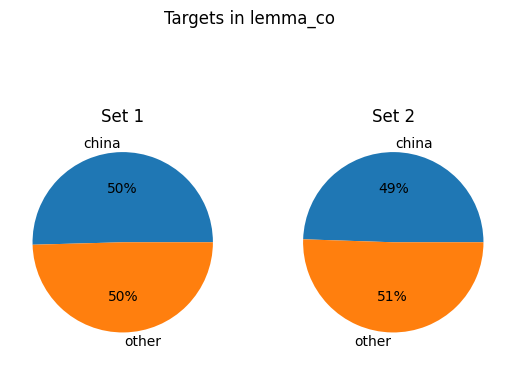

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].pie(train_lemma_co.groupby(['y']).size(),
        labels = ['china', 'other'],
         autopct = '%1.0f%%',
         )
ax[0].set_title('Set 1')

ax[1].pie(test_lemma_co.groupby(['y']).size(),
        labels = ['china', 'other'],
         autopct = '%1.0f%%',
         )
ax[1].set_title('Set 2')

fig.suptitle('Targets in lemma_co')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV(tol=0.01)
clf.fit(train_stem_co.loc[:, train_stem_co.columns != 'y'], train_stem_co['y'])

print(len(clf.coef_[clf.coef_!=0]))

stemmed_D = data_stem.keys()[:-1][clf.coef_!=0] # remove y
print(stemmed_D)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+01, tolerance: 1.009e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.079e+01, tolerance: 1.009e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e+01, tolerance: 1.009e

In [ ]:
pd.Series(stemmed_D).to_csv(r'/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_stem_D_a.csv', index=False, header=False)

In [ ]:
stemmed_D = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_stem_D_a.csv', header=None)
print(stemmed_D)

            0
0    american
1         ccp
2     country
3         get
4   happiness
5          im
6         job
7        like
8       paper
9      people
10        phd
11          u
12          w
13       work
14      world
15         xi


# DoubleML